In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd

#visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set(rc={'figure.figsize':(31.7,28.27)})

In [2]:
#Read in and Explore the Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.describe(include = "all"));

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001841   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000         600.00000   
unique 

In [4]:
nan_value_detail = pd.isnull(train).sum();
print(nan_value_detail)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
print(train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [6]:
#loan status mapping
load_status_mapping = {"Y": 1, "N": 0}
train['Loan_Status'] = train['Loan_Status'].map(load_status_mapping)
print(train['Loan_Status'].head())

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64


In [7]:
train["Gender"] = train["Gender"].fillna('Male')
test["Gender"] = test["Gender"].fillna('Male')
#mapping
Gender_mapping = {"Male": 1, "Female": 2}
train['Gender'] = train['Gender'].map(Gender_mapping)
test['Gender'] = test['Gender'].map(Gender_mapping)

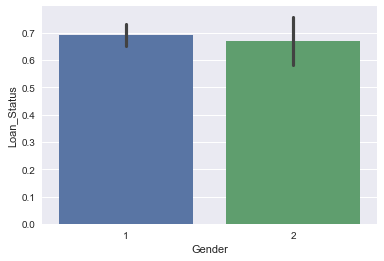

In [8]:
sns.barplot(x="Gender", y="Loan_Status", data=train)

In [9]:
train["Married"] = train["Married"].fillna('Yes')
test["Married"] = test["Married"].fillna('Yes')
#mapping
Marriage_mapping = {"Yes": 1, "No": 2}
train['Married'] = train['Married'].map(Marriage_mapping)
test['Married'] = test['Married'].map(Marriage_mapping)

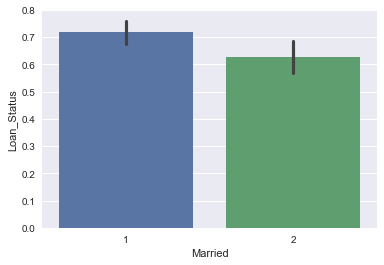

In [10]:
sns.barplot(x="Married", y="Loan_Status", data=train)

In [11]:
train["Dependents"] = train["Dependents"].fillna("0")
test["Dependents"] = test["Dependents"].fillna("0")

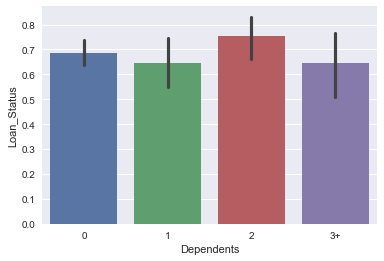

In [12]:
sns.barplot(x="Dependents", y="Loan_Status", data=train)

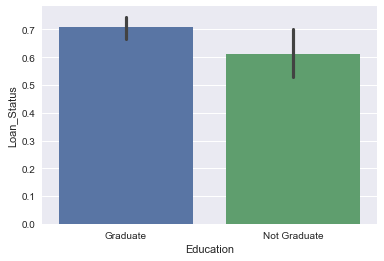

In [13]:
sns.barplot(x="Education", y="Loan_Status", data=train)

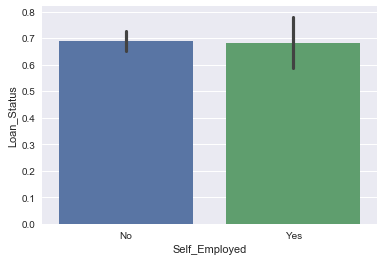

In [14]:
train["Self_Employed"] = train["Self_Employed"].fillna("No")
test["Self_Employed"] = test["Self_Employed"].fillna("No")
sns.barplot(x="Self_Employed", y="Loan_Status", data=train)

In [15]:
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

In [16]:
print(train.head())

    Loan_ID  Gender  Married Dependents     Education Self_Employed  \
0  LP001002       1        2          0      Graduate            No   
1  LP001003       1        1          1      Graduate            No   
2  LP001005       1        1          0      Graduate           Yes   
3  LP001006       1        1          0  Not Graduate            No   
4  LP001008       1        2          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  Total_income  
0             1.0         Urban            1        5849.0  
1             1.0       

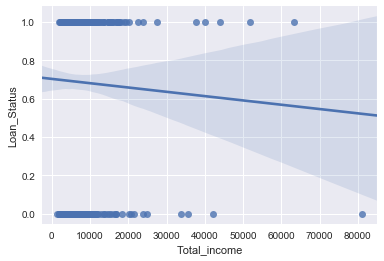

In [17]:

sns.regplot(x="Total_income", y="Loan_Status", data=train)

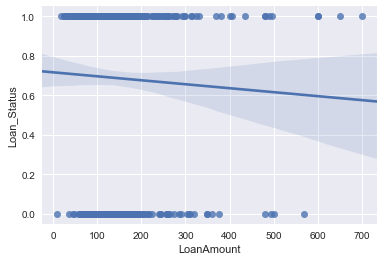

In [18]:
train["LoanAmount"] = train["LoanAmount"].fillna(np.mean(train['LoanAmount']))
test["LoanAmount"] = test["LoanAmount"].fillna(np.mean(test['LoanAmount']))
sns.regplot(x="LoanAmount", y="Loan_Status", data=train)

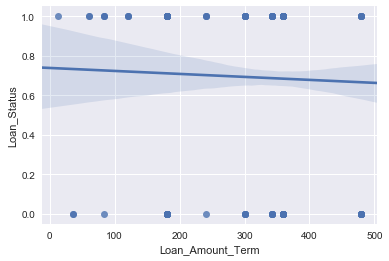

In [19]:
train["Loan_Amount_Term"] = train["Loan_Amount_Term"].fillna(np.mean(train['Loan_Amount_Term']))
test["Loan_Amount_Term"] = test["Loan_Amount_Term"].fillna(np.mean(test['Loan_Amount_Term']))
sns.regplot(x="Loan_Amount_Term", y="Loan_Status", data=train)

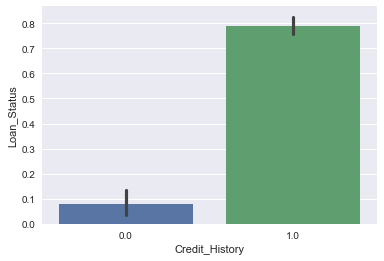

In [20]:
train["Credit_History"] = train["Credit_History"].fillna(1)
test["Credit_History"] = test["Credit_History"].fillna(1)
sns.barplot(x="Credit_History", y="Loan_Status", data=train)

In [21]:
#make data ready 

In [22]:
dtrain = train
dtest = test

In [23]:
print(dtrain.head())

    Loan_ID  Gender  Married Dependents     Education Self_Employed  \
0  LP001002       1        2          0      Graduate            No   
1  LP001003       1        1          1      Graduate            No   
2  LP001005       1        1          0      Graduate           Yes   
3  LP001006       1        1          0  Not Graduate            No   
4  LP001008       1        2          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area  Loan_Status  Total_income  
0             1.0         Urban            1        5849.0  
1             1.0       

In [24]:
dtrain = dtrain.drop(['Loan_ID'], axis=1)
dtest = dtest.drop(['Loan_ID'], axis=1)
#x = dtrain.drop(['Loan_Status'], axis=1)
#y = dtrain["Loan_Status"]

In [25]:
#make all fields numeric 
#map each Education value to a numerical value
Education_mapping = {"Graduate": 1, "Not Graduate": 0}
dtrain['Education'] = dtrain['Education'].map(Education_mapping)
dtest['Education'] = dtest['Education'].map(Education_mapping)

In [26]:
#map each Self_Employed value to a numerical value
Self_Employed_mapping = {"No": 0, "Yes": 1}
dtrain['Self_Employed'] = dtrain['Self_Employed'].map(Self_Employed_mapping)
dtest['Self_Employed'] = dtest['Self_Employed'].map(Self_Employed_mapping)

In [27]:
#map each Property_Area value to a numerical value
Property_Area_mapping = {"Rural": 0, "Semiurban": 1, "Urban": 2}
dtrain['Property_Area'] = dtrain['Property_Area'].map(Property_Area_mapping)
dtest['Property_Area'] = dtest['Property_Area'].map(Property_Area_mapping)

In [29]:
#map each Property_Area value to a numerical value
Dependents_Area_mapping = {"0": 0, "1": 1, "2": 2, "3+": 3}
dtrain['Dependents'] = dtrain['Dependents'].map(Dependents_Area_mapping)
dtest['Dependents'] = dtest['Dependents'].map(Dependents_Area_mapping)

In [31]:
print(dtrain)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        2           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        2           0          1              0             6000   
5         1        1           2          1              1             5417   
6         1        1           0          0              0             2333   
7         1        1           3          1              0             3036   
8         1        1           2          1              0             4006   
9         1        1           1          1              0            12841   
10        1        1           2          1              0             3200   
11        1        1           2          1         

In [32]:
#Choosing the Best Model
from sklearn.model_selection import train_test_split
x = dtrain.drop(['Loan_Status'], axis=1)
y = dtrain["Loan_Status"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.22, random_state = 0)

In [34]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)


# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

81.62
82.35
72.79
69.85
78.68
63.24
72.06
77.94


In [35]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,82.35
4,Naive Bayes,81.62
3,Random Forest,78.68
7,Gradient Boosting Classifier,77.94
0,Support Vector Machines,72.79
6,Stochastic Gradient Descent,72.06
5,Decision Tree,69.85
1,KNN,63.24


Scores: [0.83673469 0.85714286 0.7755102  0.83673469 0.82978723 0.78723404
 0.70212766 0.80851064 0.80851064 0.80851064]
Mean: 0.8050803300043421
Standard Deviation: 0.04141542111354084
Precision: 0.785
Recall: 0.9691358024691358


0.867403314917127

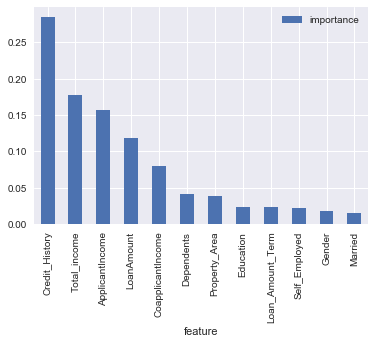

In [45]:
#kfold cross validation
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
scores = cross_val_score(logreg, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

#features minify
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(randomforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()

#confusion metrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(logreg, x_train, y_train, cv=3)
CM = confusion_matrix(y_train, predictions)
#precision and recall
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))
#f1 score
from sklearn.metrics import f1_score
f1_score(y_train, predictions)